In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
import json
from sklearn.feature_extraction.text import CountVectorizer as countVectorizer
%matplotlib inline

In [ ]:
encoding = 'ISO-8859-1'
col_names =['budget','genres','homepage','id','keywords','original_language','original_title','overview','popularity','production_companies','production_countries','release_date','revenue','runtime','spoken_languages','status','tagline','title','average','vote_count']
movies = pd.read_csv('/content/drive/MyDrive/ML_DATASET_CSE445/tmdb_5000_movies.csv',encoding = encoding)
credits= pd.read_csv('/content/drive/MyDrive/ML_DATASET_CSE445/tmdb_5000_credits.csv',encoding = encoding)

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bonds past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0


In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies = movies.merge(credits, on='title', suffixes=('', '_credits'))
# Drop the `movie_id_x`, `cast_x`, and `crew_x` columns.
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4804 entries, 0 to 4803
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4804 non-null   object 
 1   genres                4804 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4804 non-null   object 
 4   keywords              4804 non-null   object 
 5   original_language     4804 non-null   object 
 6   original_title        4804 non-null   object 
 7   overview              4801 non-null   object 
 8   popularity            4804 non-null   object 
 9   production_companies  4804 non-null   object 
 10  production_countries  4804 non-null   object 
 11  release_date          4803 non-null   object 
 12  revenue               4804 non-null   object 
 13  runtime               4802 non-null   float64
 14  spoken_languages      4804 non-null   object 
 15  status               

In [ ]:
movies = movies[['movie_id','title','genres','keywords','cast','crew','vote_average']]
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4804 entries, 0 to 4803
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4804 non-null   int64  
 1   title         4804 non-null   object 
 2   genres        4804 non-null   object 
 3   keywords      4804 non-null   object 
 4   cast          4804 non-null   object 
 5   crew          4804 non-null   object 
 6   vote_average  4804 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 300.2+ KB


In [ ]:
movies.isnull().sum()

movie_id        0
title           0
genres          0
keywords        0
cast            0
crew            0
vote_average    0
dtype: int64

In [ ]:
movies.dropna(inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4804 entries, 0 to 4803
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4804 non-null   int64  
 1   title         4804 non-null   object 
 2   genres        4804 non-null   object 
 3   keywords      4804 non-null   object 
 4   cast          4804 non-null   object 
 5   crew          4804 non-null   object 
 6   vote_average  4804 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 300.2+ KB


In [ ]:
import ast
import json


def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L


In [ ]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,title,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9
2,206647,Spectre,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1


In [ ]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1


In [ ]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()

,movie_id,title,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1


In [ ]:
# Function to fetch director names
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [ ]:
#taking only directors as a crew
movies['crew'] = movies['crew'].apply(fetch_director)
movies.head()

,movie_id,title,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],7.2
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],6.9
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],6.3
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],7.6
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],6.1


In [ ]:
movies.head()

,movie_id,title,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],7.2
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],6.9
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],6.3
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],7.6
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],6.1


In [ ]:
#removing space
def collapse(L):
    L1 = [i.replace(" ", "") for i in L]
    return L1

In [ ]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)
movies.head()

,movie_id,title,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],7.2
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],6.9
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],6.3
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],7.6
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],6.1


In [ ]:
movies['genres'] = movies['genres'].apply(lambda x: " ".join(x))
movies.head()

,movie_id,title,genres,keywords,cast,crew,vote_average
0,19995,Avatar,Action Adventure Fantasy ScienceFiction,"[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],7.2
1,285,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,"[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],6.9
2,206647,Spectre,Action Adventure Crime,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],6.3
3,49026,The Dark Knight Rises,Action Crime Drama Thriller,"[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],7.6
4,49529,John Carter,Action Adventure ScienceFiction,"[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],6.1


In [ ]:
cv = countVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(movies['genres']).toarray()

In [ ]:
# Apply K-means clustering
# Create a KMeans model
kmeans = KMeans(n_clusters=200,random_state =42,n_init=5)

# Fit the KMeans model to the vectorized movie data
kmeans.fit(vector)

# Get the cluster labels for each movie
cluster_labels = kmeans.predict(vector)
print(cluster_labels)
# Create a dictionary to map cluster labels to movie titles
cluster_to_movie_dict = {}
for i in range(len(movies)):
    cluster_label = cluster_labels[i]
    movie_title = movies.iloc[i]['title']


    if cluster_label not in cluster_to_movie_dict:
        cluster_to_movie_dict[cluster_label] = []

    cluster_to_movie_dict[cluster_label].append(movie_title)
print(cluster_to_movie_dict)


[14  7 14 ...  6 19 19]
{14: ['Avatar', 'Spectre', 'John Carter', 'Avengers: Age of Ultron', 'Superman Returns', 'The Lone Ranger', 'Man of Steel', 'The Avengers', 'Robin Hood', 'Captain America: Civil War', 'Iron Man 3', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'TRON: Legacy', 'X-Men: Days of Future Past', 'Star Trek Into Darkness', 'Pacific Rim', 'Transformers: Dark of the Moon', 'Indiana Jones and the Kingdom of the Crystal Skull', 'Star Trek Beyond', '2012', 'Jupiter Ascending', 'The Legend of Tarzan', 'Iron Man', 'Wild Wild West', 'Suicide Squad', 'Waterworld', 'Iron Man 2', 'The Lovers', 'Captain America: The Winter Soldier', 'Tomorrowland', 'Independence Day: Resurgence', 'Guardians of the Galaxy', 'Shin Godzilla', 'X-Men: First Class', 'The Hunger Games: Mockingjay - Part 2', 'Transformers', 'Men in Black II', 'Beowulf', 'Star Trek', 'Captain America: The First Avenger', 'The Incredible Hulk', 'Ant-Man', 'The Hunger Games: Catching Fire', 'After

In [ ]:

def recommend_movies(movie_title):
    """Recommends movies for the given movie title."""
    if movie_title not in movies['title'].values:
        print("Movie not found in the dataset.")
        return []

    # Get the cluster label for the given movie title.
    movie_index = movies[movies['title'] == movie_title].index[0]
    movie_cluster_label = cluster_labels[movie_index]

    # Get the recommended movies for the movie cluster.
    recommended_movies = cluster_to_movie_dict[movie_cluster_label]

    # Exclude the input movie from recommendations if it's in the cluster.
    if movie_title in recommended_movies:
        recommended_movies.remove(movie_title)

    for movie in recommended_movies[:5]:
      print(movie)


In [ ]:
recommended_movies = recommend_movies('Interstellar')


King Kong
Hugo
Snow White and the Huntsman
47 Ronin
The Sorcerer's Apprentice


In [ ]:
recommended_movies = recommend_movies('Spider-Man')


Pirates of the Caribbean: At World's End
Spider-Man 3
Harry Potter and the Half-Blood Prince
Batman v Superman: Dawn of Justice
Pirates of the Caribbean: Dead Man's Chest


In [ ]:
recommended_movies = recommend_movies('The Matrix')

Battleship
Jurassic World
X-Men: The Last Stand
Green Lantern
Terminator Salvation


In [ ]:
recommended_movies = recommend_movies('The Conjuring')

End of Days
The Haunting
Red Dragon
Exorcist: The Beginning
Underworld: Awakening


In [ ]:
recommended_movies = recommend_movies('Titanic')


The Great Gatsby
Pearl Harbor
Cinderella
Cinderella Man
Memoirs of a Geisha


In [ ]:
from sklearn.metrics import silhouette_score
k =200
silhouette_avg = silhouette_score(vector, kmeans.labels_)
print(f"The average silhouette_score for {k} clusters is: {silhouette_avg}")

The average silhouette_score for 200 clusters is: 0.3366758405014709


In [ ]:
best_score = -1
best_cluster = 0
for i in range(5,k+1,5):
  kmeans = KMeans(n_clusters=i,random_state=42,n_init=5)
  kmeans.fit(vector)
  silhouette_avg = silhouette_score(vector, kmeans.labels_)
  print(f"For n_clusters = {i}, the average silhouette_score is: {silhouette_avg}")

  if silhouette_avg > best_score:
         best_score = silhouette_avg
         best_cluster = i
print(f"The best number of clusters is {best_cluster} with a silhouette score of {best_score}")


For n_clusters = 5, the average silhouette_score is: 0.20422512230215883
For n_clusters = 10, the average silhouette_score is: 0.24697135312835986
For n_clusters = 15, the average silhouette_score is: 0.28851176856244837
For n_clusters = 20, the average silhouette_score is: 0.3221823078775782
For n_clusters = 25, the average silhouette_score is: 0.364721273782971
For n_clusters = 30, the average silhouette_score is: 0.3855660066269869
For n_clusters = 35, the average silhouette_score is: 0.41001216458622614
For n_clusters = 40, the average silhouette_score is: 0.432414433902971
For n_clusters = 45, the average silhouette_score is: 0.44947897127395614
For n_clusters = 50, the average silhouette_score is: 0.46749367212466647
For n_clusters = 55, the average silhouette_score is: 0.4899975169388041
For n_clusters = 60, the average silhouette_score is: 0.5054013096666287
For n_clusters = 65, the average silhouette_score is: 0.5276498166094362
For n_clusters = 70, the average silhouette_scor

In [ ]:
import matplotlib.pyplot as plt

# Initialize an empty list to store SSE values for each k
sse_values = []

# Define a range of k values to test
k_values = range(1, 250, 10)  # You can adjust the range as needed

# Calculate SSE for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
    kmeans.fit(vector)
    sse_values.append(kmeans.inertia_)
    print(f"for k = {k} sse is {kmeans.inertia_}")

for k = 1 sse is 9166.0768109909
for k = 11 sse is 4294.786080985769
for k = 21 sse is 3239.874986392987
for k = 31 sse is 2652.203215148606
for k = 41 sse is 2303.1974764137976
for k = 51 sse is 2018.254892256372
for k = 61 sse is 1792.2489688711935
for k = 71 sse is 1622.7192604197755
for k = 81 sse is 1448.3284064867476
for k = 91 sse is 1330.0374012599896
for k = 101 sse is 1244.8512681647717
for k = 111 sse is 1136.4520476095122
for k = 121 sse is 1059.9772937566022
for k = 131 sse is 988.8451384970251
for k = 141 sse is 937.5869416839583
for k = 151 sse is 862.9936188582767
for k = 161 sse is 813.2900913071633
for k = 171 sse is 765.3481001392339
for k = 181 sse is 720.3822006473038
for k = 191 sse is 679.8020521966143
for k = 201 sse is 646.0668811542741
for k = 211 sse is 607.455857520449
for k = 221 sse is 572.0455045815477
for k = 231 sse is 542.8331268604004
for k = 241 sse is 512.7091418123653


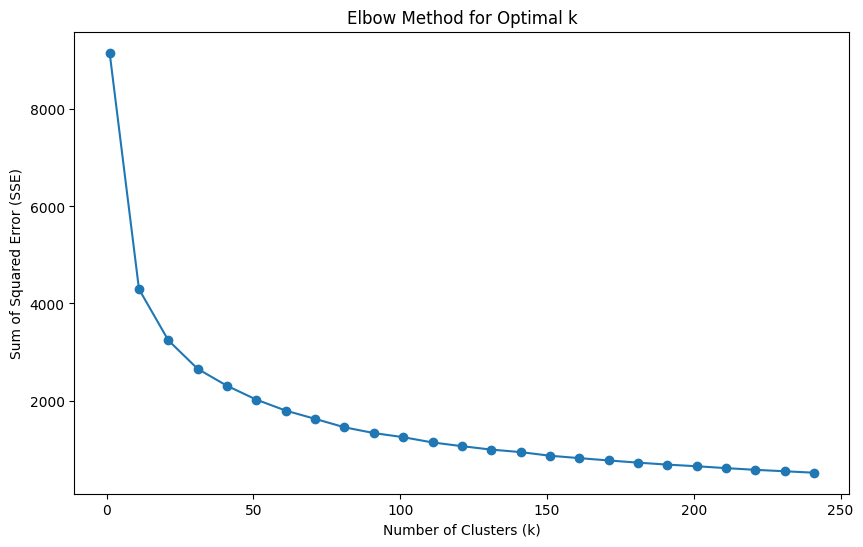

In [ ]:
# Plot the SSE values
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()